In [2]:
# CPC -SPP

# <font color = 'blue'> Predições de Venda das Lojas Rossmann </font>

# Agenda

1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão & Demonstração
5. Próximos Passos

# <font color = 'blue'> 1. Contexto </font>

- Reunião Mensal de Resultados.
- CFO pediu uma Previsão de Vendas das Próximas 6 semanas de cada Loja

# <font color = 'blue'> 2. Desafio </font>

# Problema
- Definição do Budget para a Reforma das Lojas

# Causas
- Predição de Vendas Atual apresentava muita divergência.
- O processo de Predição de Vendas é baseado em métodos Empírico.
- Toda a Previsão de Vendas é feita Manualmente pelas 1.115 Lojas da Rossmann.
- Visualização das Venda é Limitada ao Computador

# Solução
- Usar Machine Learning para realizar a Previsão de Vendas de Todas as Lojas
- Visualização das Predições de vendas poderão ser feitas pelo Smartphone

# <font color = 'blue'> 3. Desenvolvimento da Solução </font>

# DESCRIÇÃO DOS DADOS 

In [9]:
print("Number of Rows: {}".format(df1.shape[0]))
print("Number of Cols: {}".format(df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


# Descriptive Statistical

In [7]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['features', 'min', 'max', 'range',
             'mean', 'median', 'std', 'skew', 'kurtosis']
m

NameError: name 'pd' is not defined

# Mapa Mental de Hipóteses

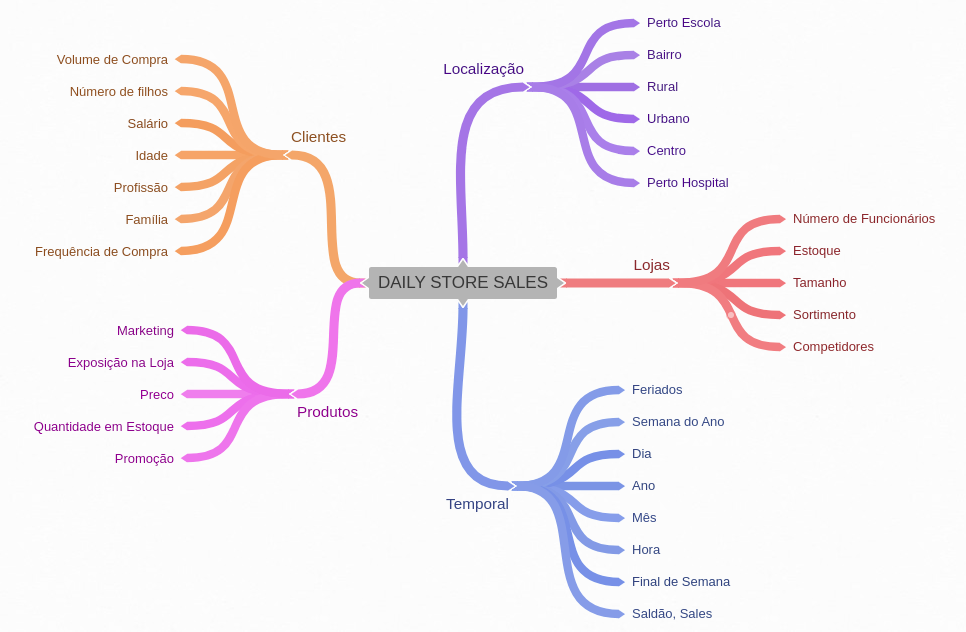

In [21]:
Image('/media/fernando/FERNANDO/DataScience/Comunidade_DS/Rossmann_Store_Sales_Predict/img/MindMapHypothesis.png')

# Hipóteses Da Análise Exploratória

**01.** Lojas com maior sortimentos deveriam vender mais.

**02.** Lojas com competidores mais próximos deveriam vender menos.

**03.** Lojas com competidores à mais tempo deveriam vendem mais.

**04.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**05.** Lojas com mais dias de promoção deveriam vender mais.

**06.** Lojas com mais promoções consecutivas deveriam vender mais.

**07.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**08.** Lojas deveriam vender mais ao longo dos anos.

**09.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

# ANÁLISE EXPLORATÓRIA DOS DADOS

# Response Variable

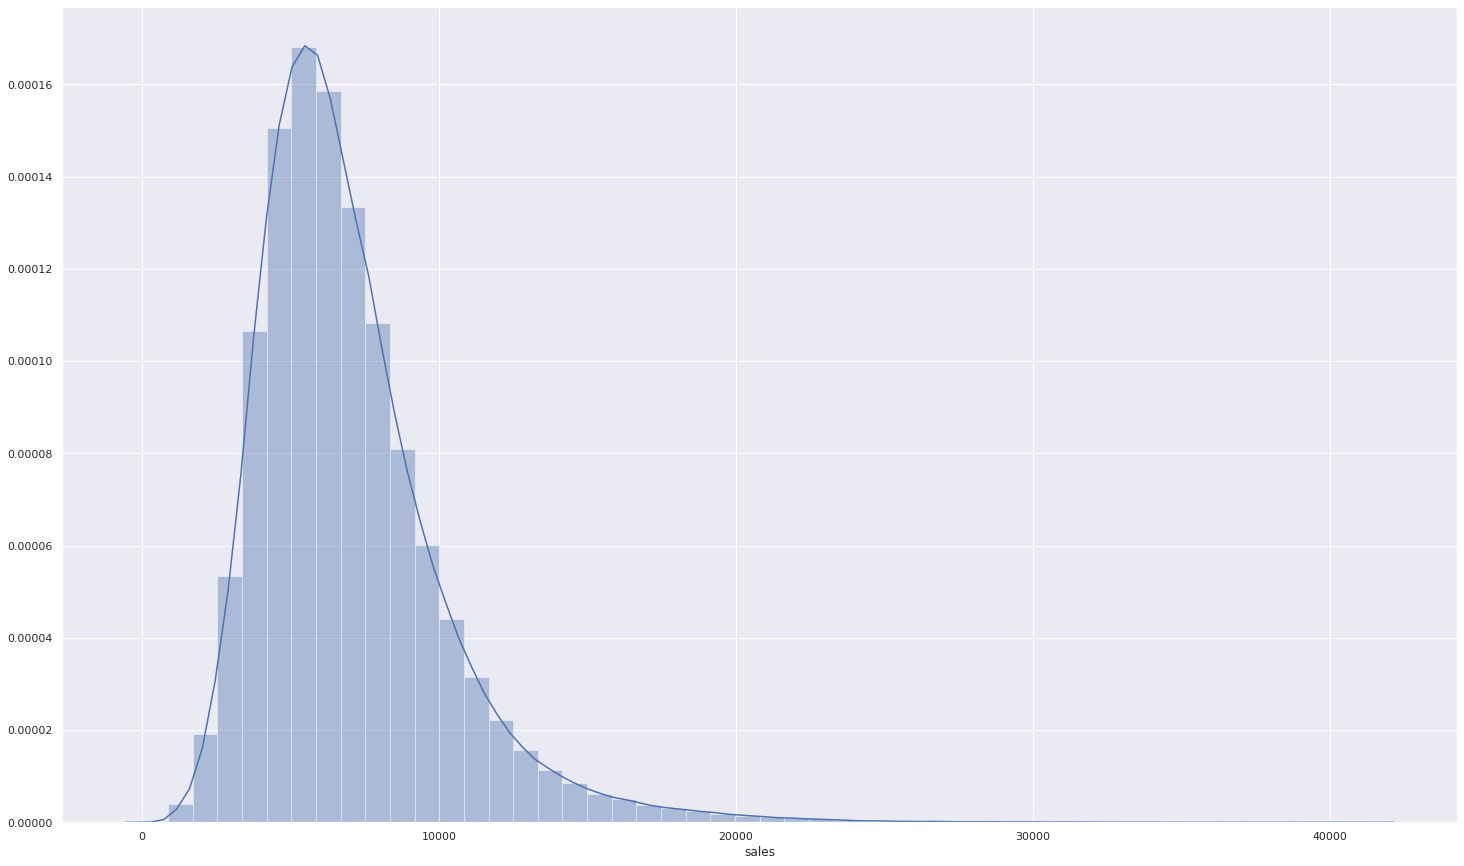

In [31]:
sns.distplot(df4['sales']); # para distribuição KDE = True

# sns.distplot(df4['sales'], kde = False); # quando plotar histograma, usa o KDE = false

# Numerical Variable

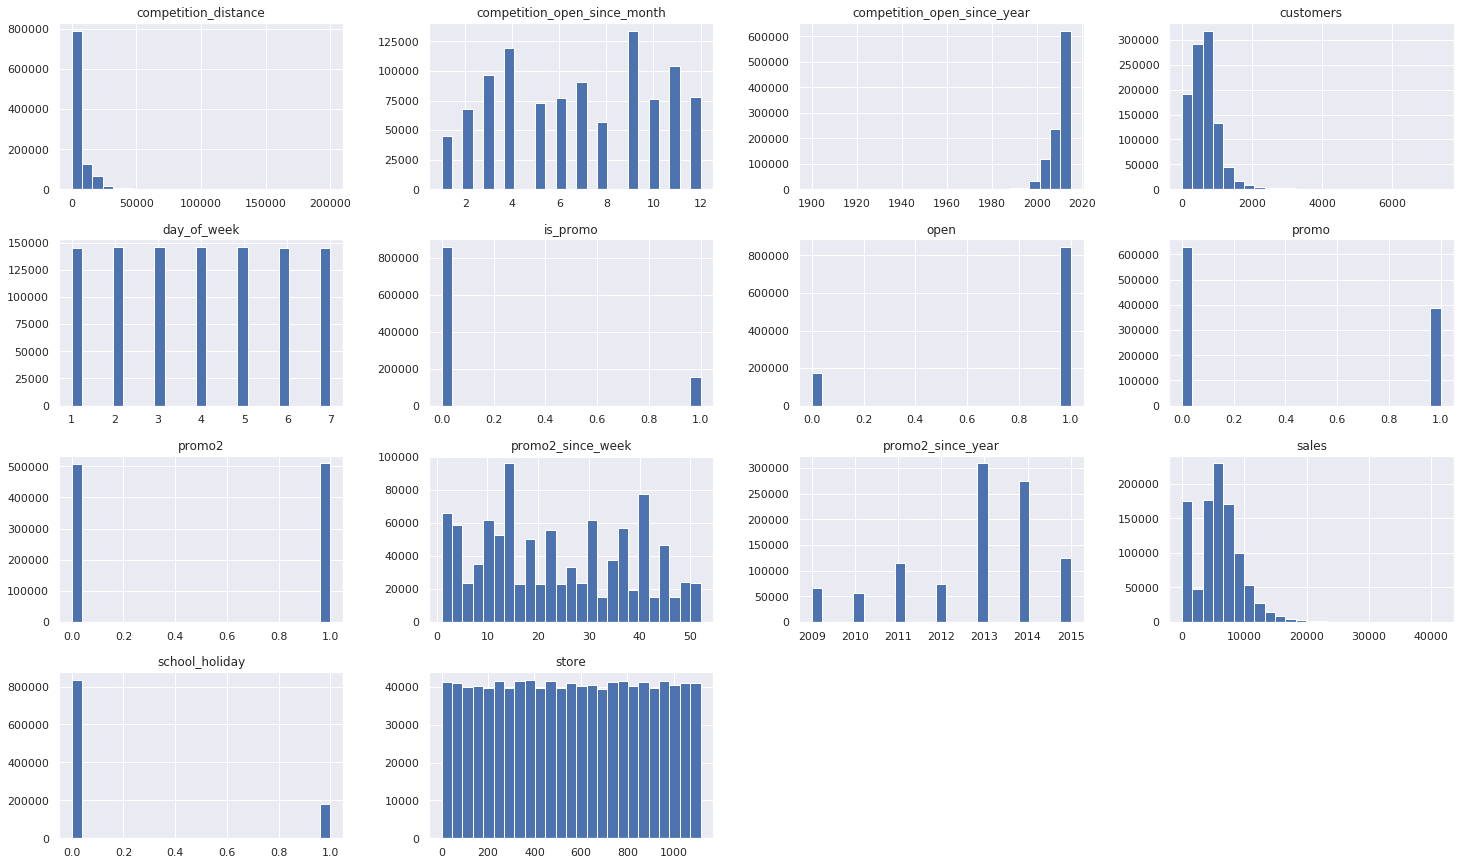

In [32]:
num_attributes.hist(bins = 25);

# Categorical Variable

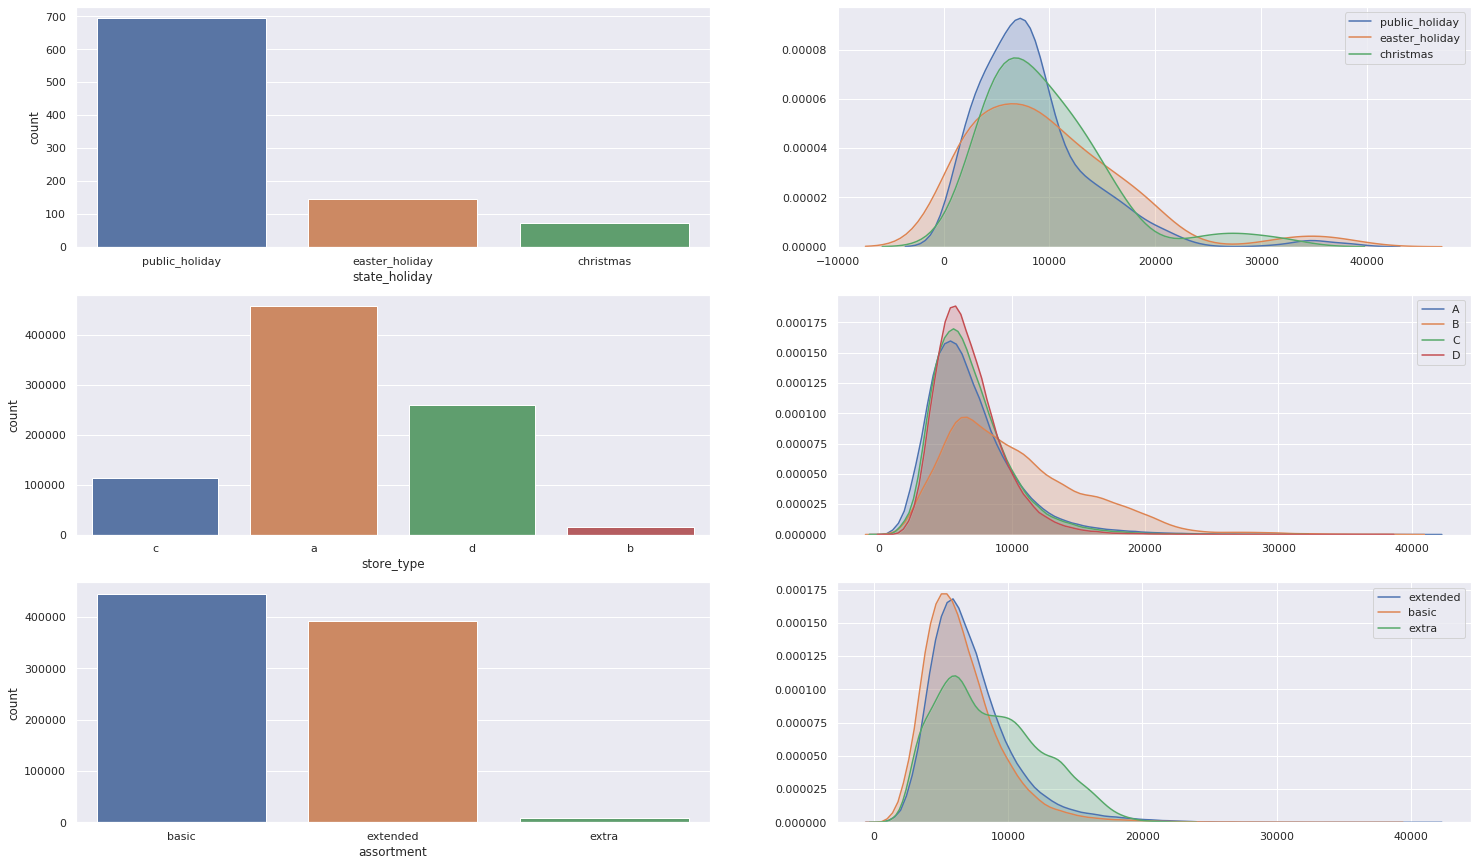

In [33]:
# state_holiday
plt.subplot(3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday']);

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday', shade = True);
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday', shade = True);
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas', shade = True);

# store_type
plt.subplot(3, 2, 3)
sns.countplot(df4['store_type']);

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label = 'A', shade = True);
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label = 'B', shade = True);
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label = 'C', shade = True);
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label = 'D', shade = True);


# assortment
plt.subplot(3, 2, 5)
sns.countplot(df4['assortment']);

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label = 'extended', shade = True);
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label = 'basic', shade = True);
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label = 'extra', shade = True);

# Validação das Hipóteses

### **H01.** Lojas com maior sortimentos deveriam vender mais.
**FALSA*** Lojas com MAIOR SORTIMENTO vendem MENOS.

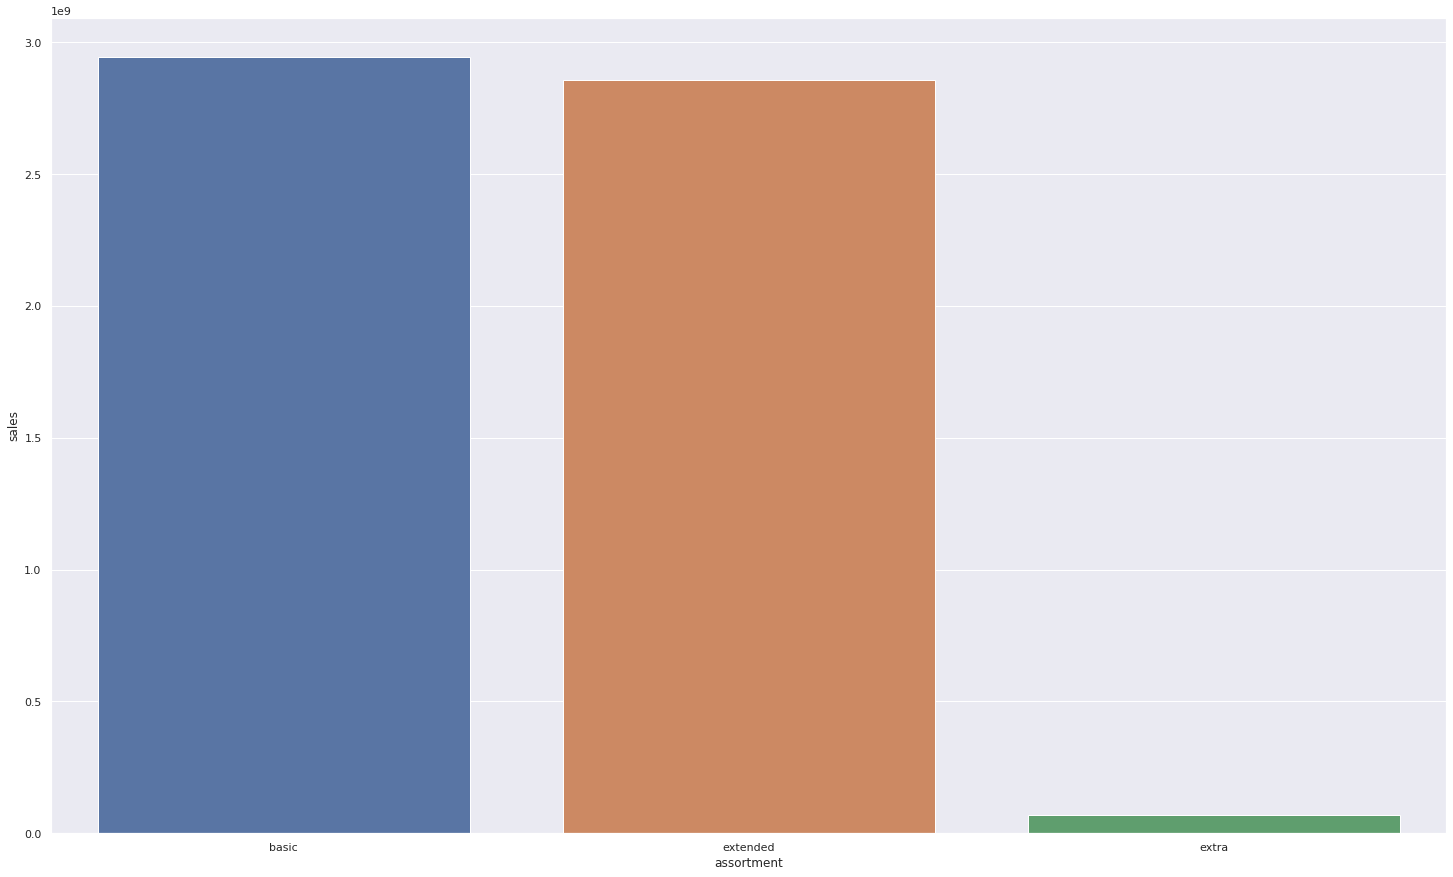

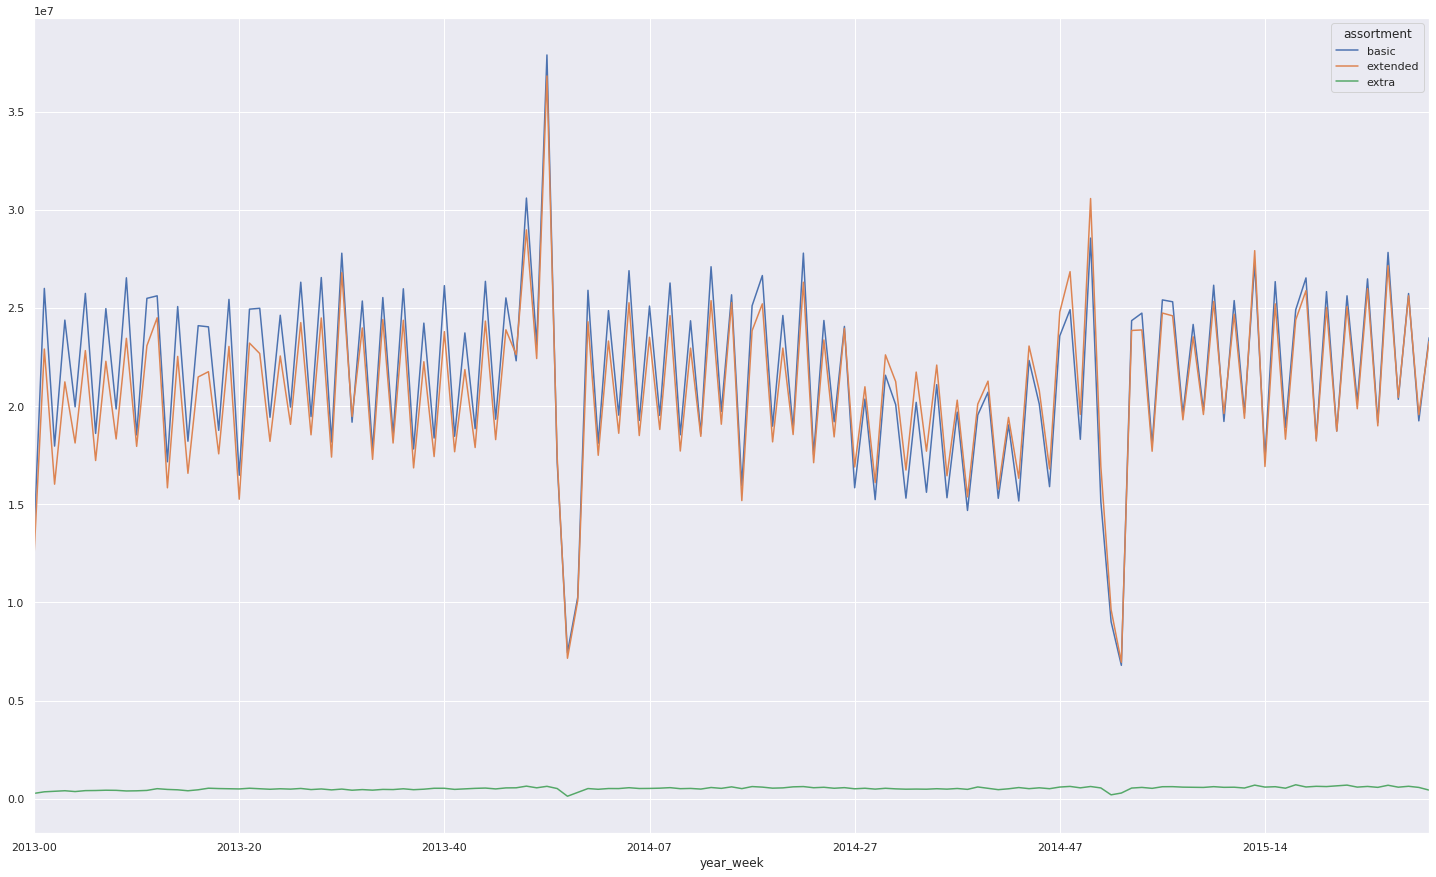

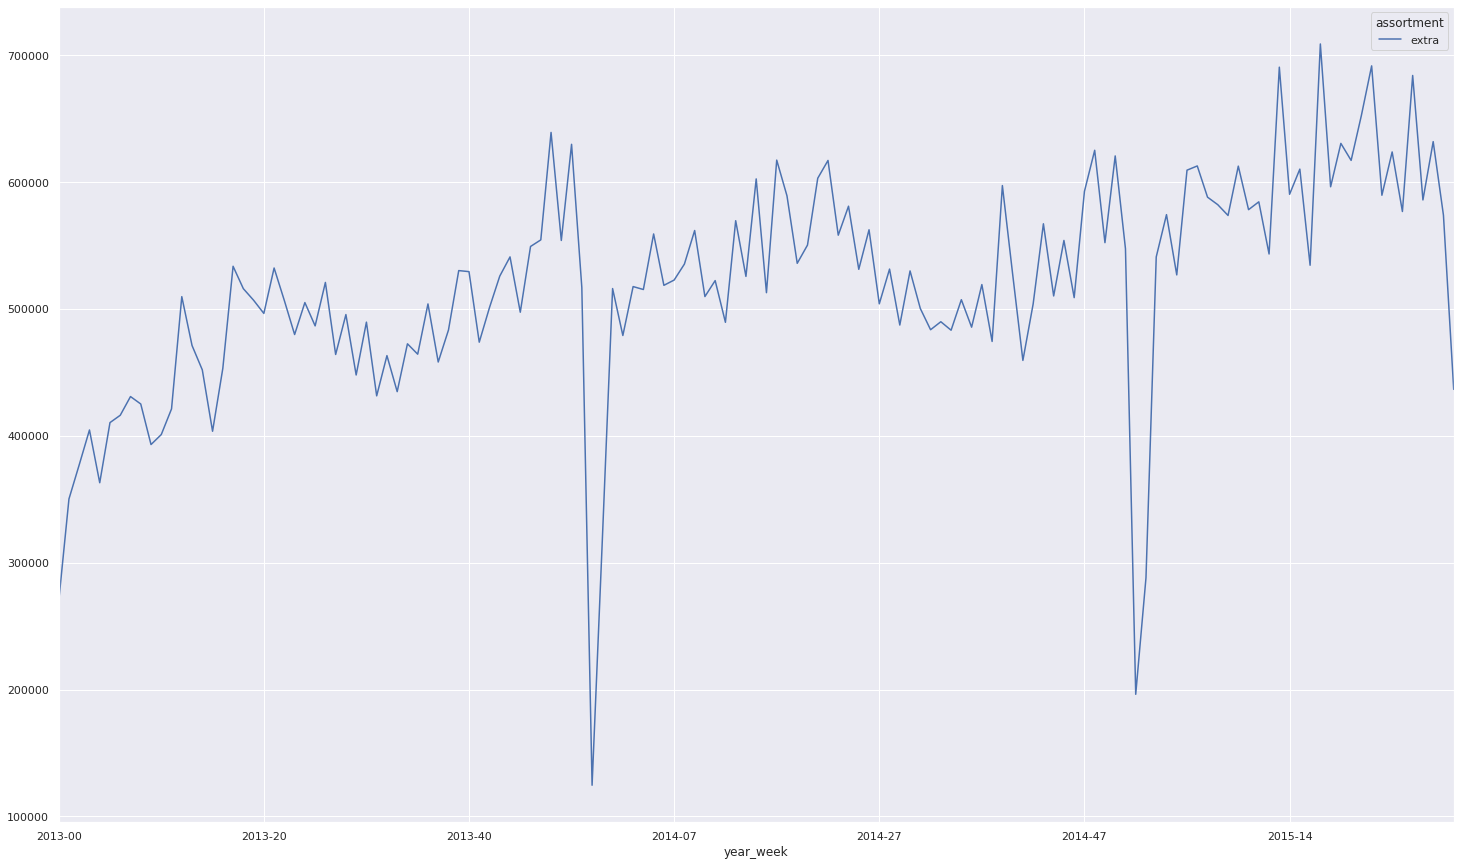

In [34]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x = 'assortment', y = 'sales', data = aux1);

aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux2.pivot(index = 'year_week', columns = 'assortment', values = 'sales').plot();

# avaliar o comportamento extra, uma vez que ele não aparece na escala quando comparado com basic e extended
aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index = 'year_week', columns = 'assortment', values = 'sales').plot();

### **H02.** Lojas com competidores mais próximos deveriam vender menos.
**FALSA** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS

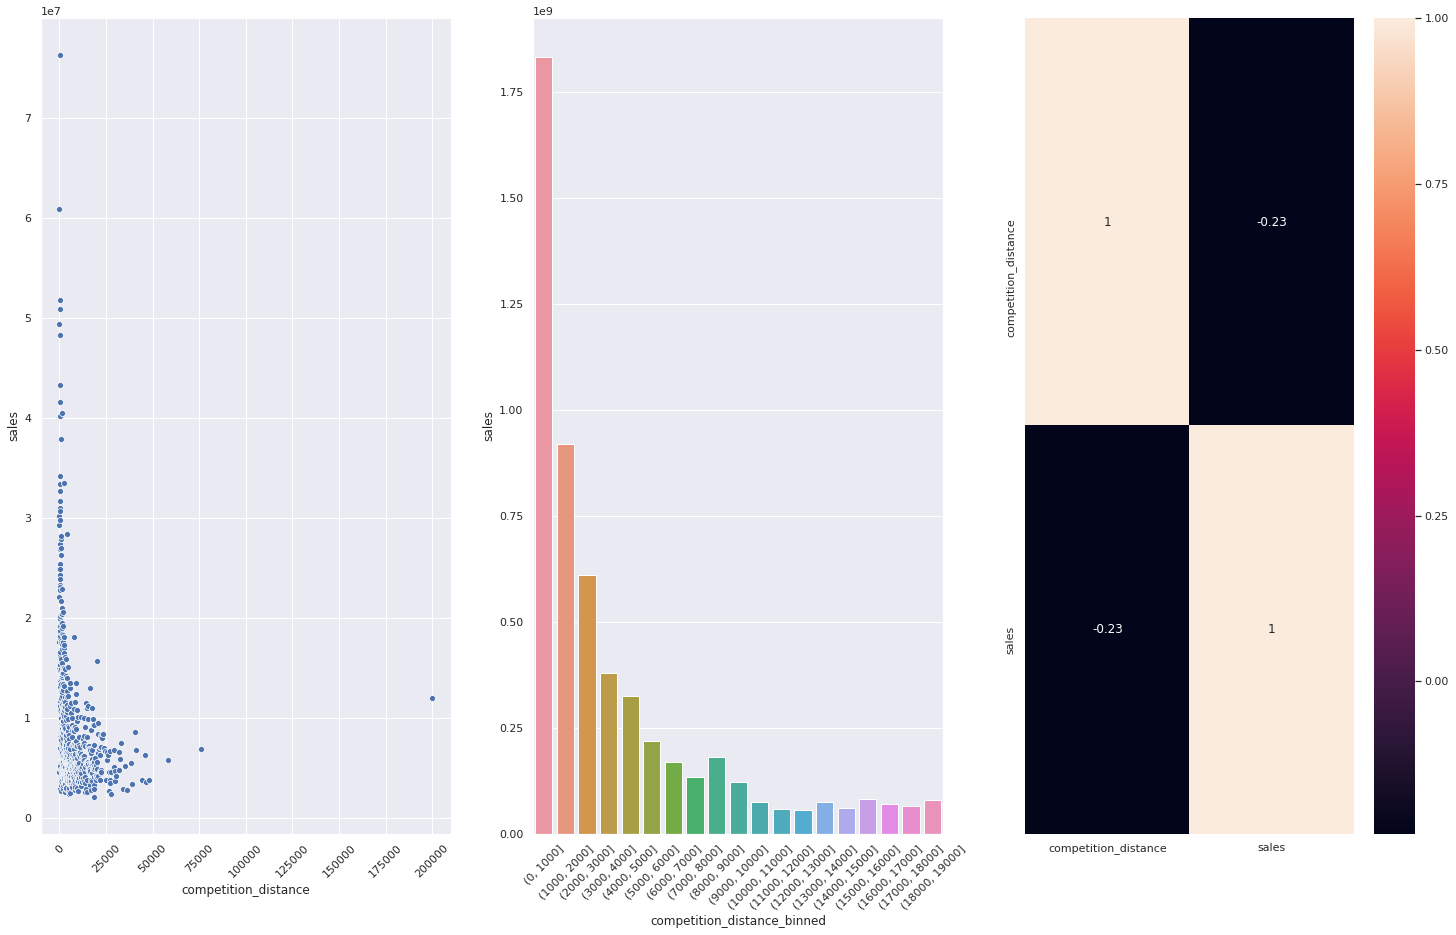

In [35]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1, 3, 1)
sns.scatterplot(x = 'competition_distance', y = 'sales', data = aux1);
plt.xticks(rotation = 45)

plt.subplot(1, 3, 2)
# agrupar as distância - cria um bin para agrupar
bins = list(np.arange(0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins = bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x = 'competition_distance_binned', y = 'sales', data = aux2);
plt.xticks(rotation = 45)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True);

### **H07.** Lojas abertas durante o feriado de Natal deveriam vender mais.
**FALSA** Lojas abertas durante o feriado do Natal vendem menos.

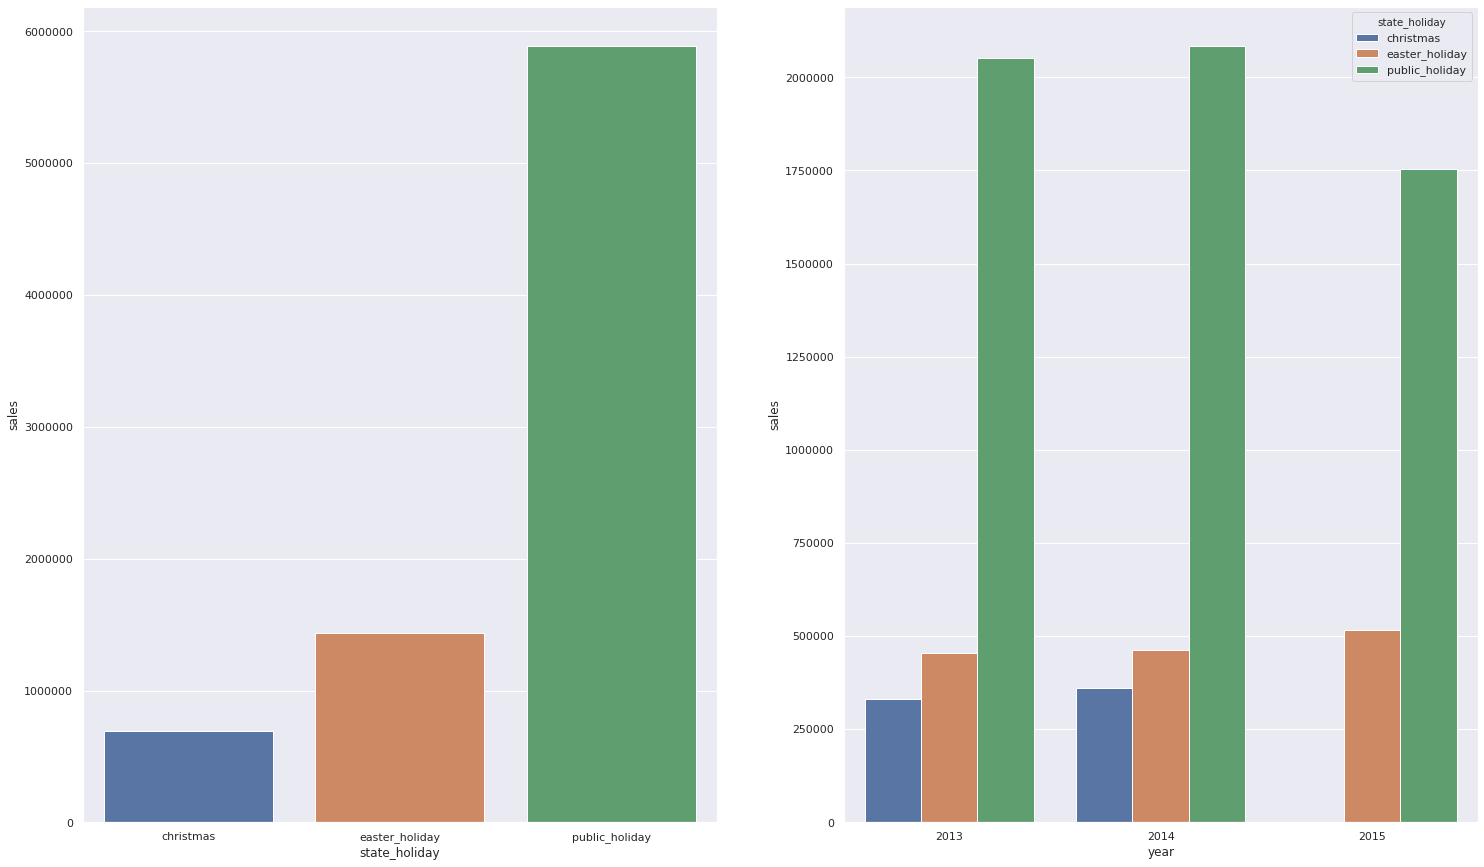

In [40]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot(1, 2, 1)
aux1 = aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x = 'state_holiday', y = 'sales', data = aux1);

plt.subplot(1, 2, 2)
aux2 = aux[['year', 'state_holiday', 'sales']].groupby(['year', 'state_holiday']).sum().reset_index()
sns.barplot(x = 'year', y = 'sales', hue = 'state_holiday', data = aux2);


### **H10.** Lojas deveriam vender mais depois do dia 10 de cada mês.
**VERDADEIRA** Lojas vendem mais depois do dia 10 de cada mês

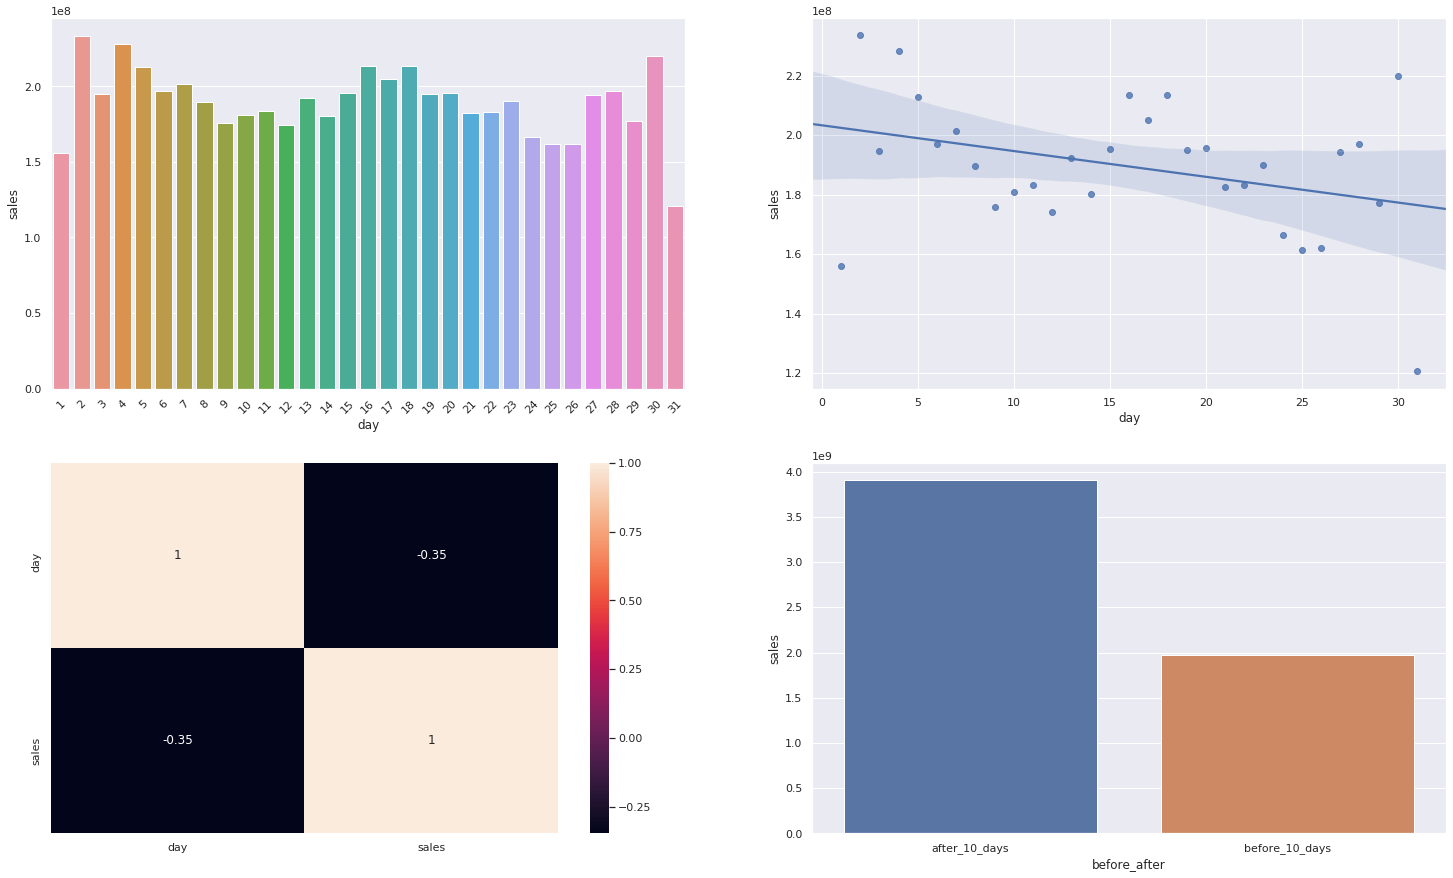

In [43]:
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()

plt.subplot(2, 2, 1)
sns.barplot(x = 'day', y = 'sales', data = aux1);
plt.xticks(rotation = 45);

plt.subplot(2, 2, 2)
sns.regplot(x = 'day', y = 'sales', data = aux1);

plt.subplot(2, 2, 3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True);

plt.subplot(2, 2, 4)
aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after', 'sales']].groupby('before_after').sum().reset_index()
sns.barplot(x = 'before_after', y = 'sales', data = aux2);

# Lista de Hipóteses

In [46]:
tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
      ['H01', 'Falsa', 'Baixa'],  
      ['H02', 'Falsa', 'Media'],  
      ['H03', 'Falsa', 'Media'],
      ['H04', 'Falsa', 'Baixa'],
      ['H05', '-', '-'],
      ['H06', 'Falsa', 'Baixa'],
      ['H07', 'Falsa', 'Media'],
      ['H08', 'Falsa', 'Alta'],
      ['H09', 'Falsa', 'Alta'],
      ['H10', 'Verdadeira', 'Alta'],
      ['H11', 'Verdadeira', 'Alta'],
      ['H12', 'Verdadeira', 'Baixa'],
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H01          Falsa        Baixa
H02          Falsa        Media
H03          Falsa        Media
H04          Falsa        Baixa
H05          -            -
H06          Falsa        Baixa
H07          Falsa        Media
H08          Falsa        Alta
H09          Falsa        Alta
H10          Verdadeira   Alta
H11          Verdadeira   Alta
H12          Verdadeira   Baixa


# Análise Multivariada

# Numerical Attributes

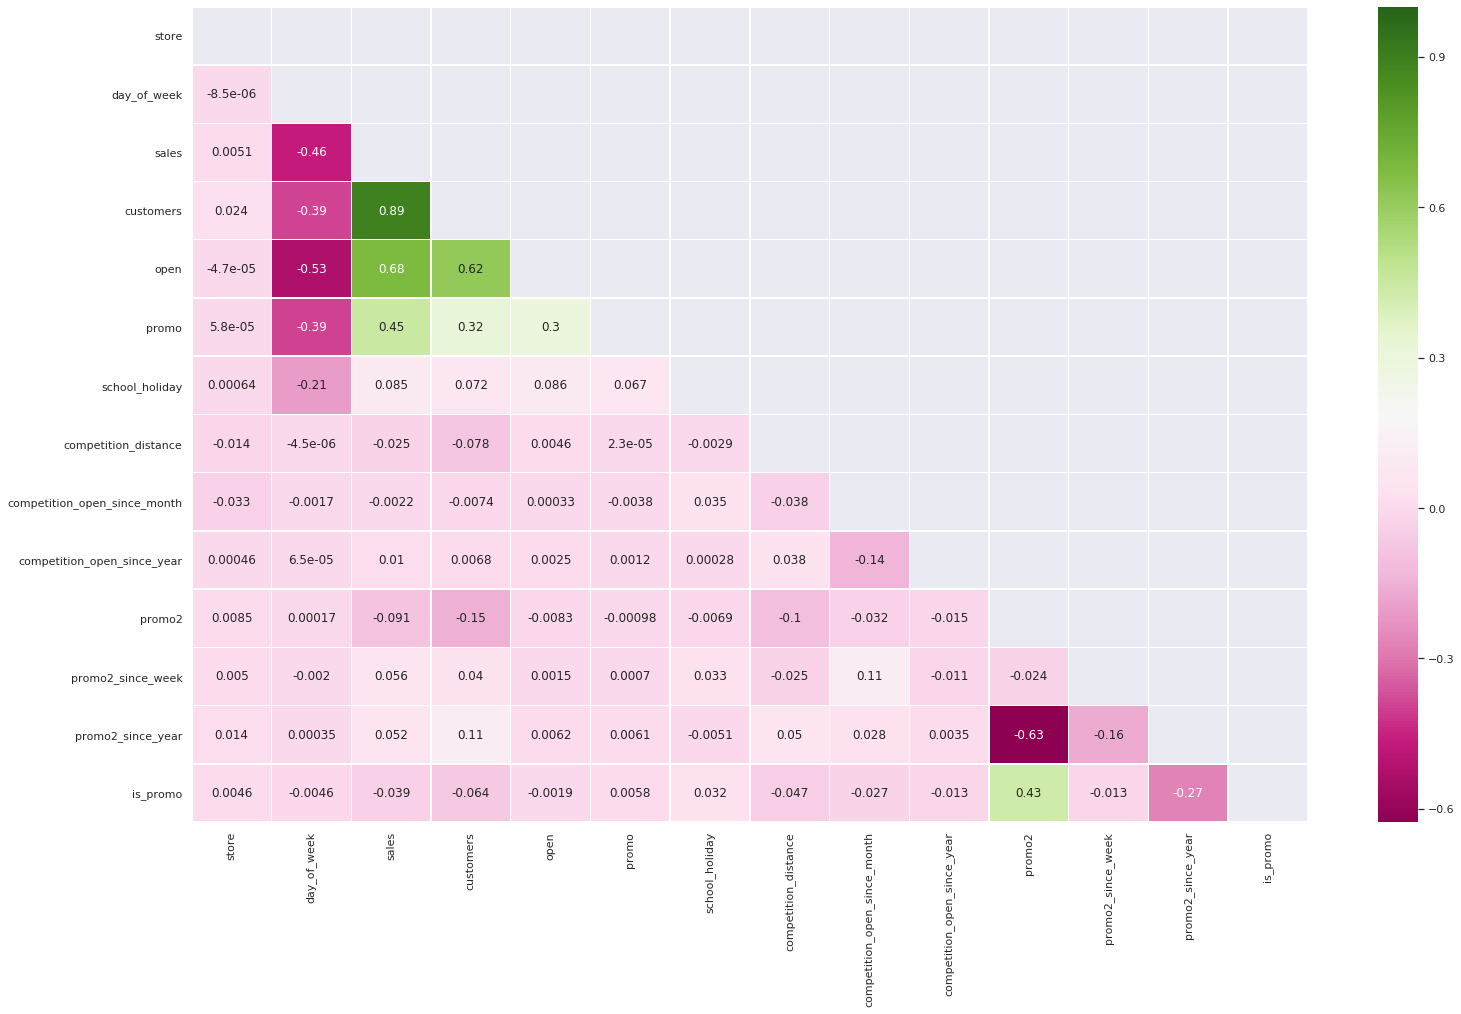

In [47]:
mask = np.triu(np.ones_like(num_attributes.corr()));
sns.heatmap(num_attributes.corr(method = 'pearson'), annot = True, linewidths=.5, cmap="PiYG", mask=mask);

A variável **customers**, apesar de possuir uma boa correlação com a variável sales, não poderá ser usada no modelo em virtude de que a mesma não é uma informação que teremos para a previsão das próximas 6 semanas uma vez que ela indica a totalidade de clientes que estiveram na loja em um determinado dia. Como no momento não ha como saber a quantidade de clientes que estarão na loja nas próximas semanas a mesma não pode ser considerada da construção do modelo.

# Categorical Attributes

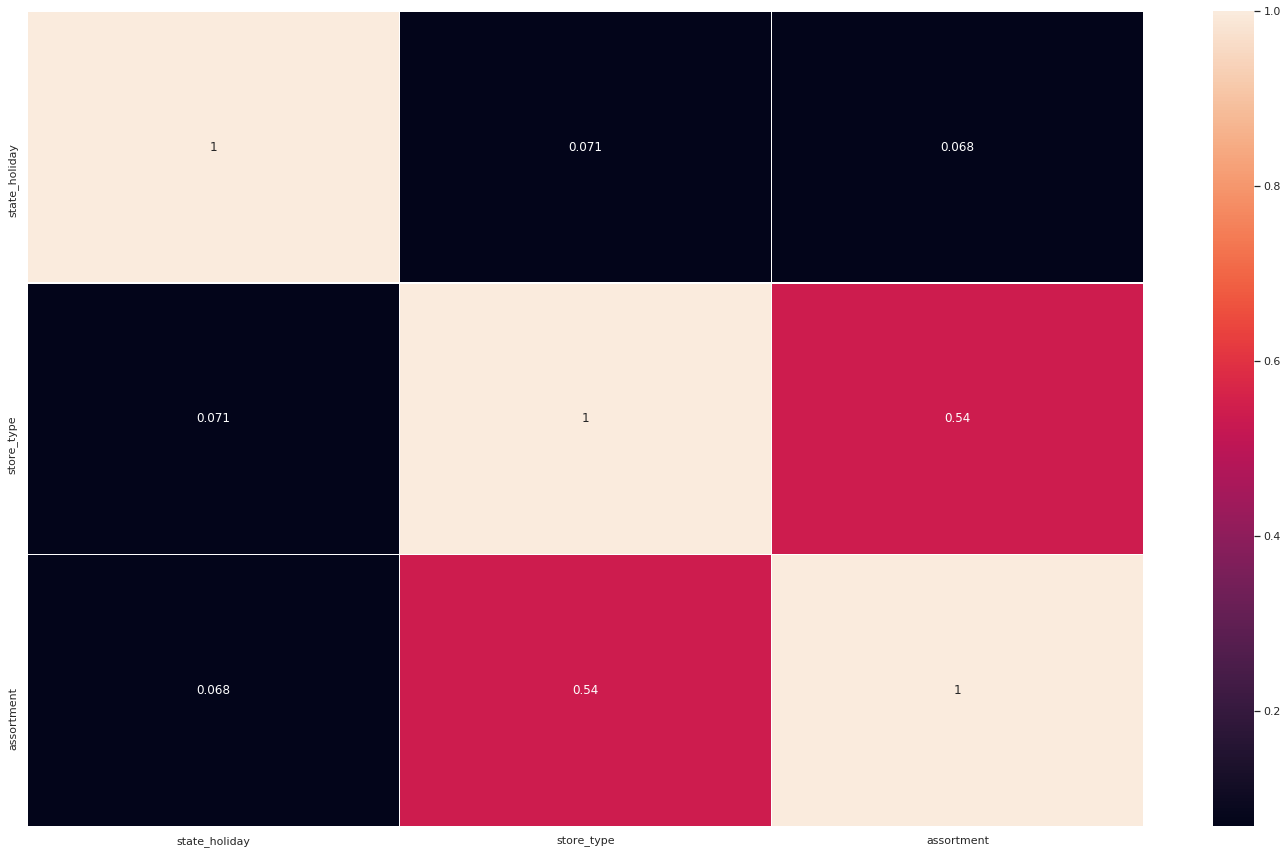

In [48]:
# only categorical data
a = df4.select_dtypes(include = 'object')

# calculate cramer v

a1 = cramer_v(a['state_holiday'], a['state_holiday'])
a2 = cramer_v(a['state_holiday'], a['store_type'])
a3 = cramer_v(a['state_holiday'], a['assortment'])

a4 = cramer_v(a['store_type'], a['state_holiday'])
a5 = cramer_v(a['store_type'], a['store_type'])
a6 = cramer_v(a['store_type'], a['assortment'])

a7 = cramer_v(a['assortment'], a['state_holiday'])
a8 = cramer_v(a['assortment'], a['store_type'])
a9 = cramer_v(a['assortment'], a['assortment'])

# final dataset

d = pd.DataFrame({'state_holiday': [a1, a2, a3], 
                  'store_type': [a4, a5, a6], 
                  'assortment': [a7, a8, a9]})

d = d.set_index(d.columns)

# heatmap
sns.heatmap(d, annot = True, linewidths=.5);

# MACHINE LEARNING MODELLING
# Compare Model's Performance

In [99]:
modelling_result_cv = pd.concat([lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv])
modelling_result_cv.sort_values('RMSE CV')

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressor,887.55 +/- 230.62,0.12 +/- 0.02,1330.49 +/- 339.89
0,XGBoost Regression,1030.28 +/- 167.19,0.14 +/- 0.02,1478.26 +/- 229.79
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37
0,Linear Regression - Lasso,2081.64 +/- 298.77,0.3 +/- 0.02,2955.91 +/- 471.18


# <font color = 'blue'> 4. Conclusão & Demonstração </font>

# TRADUÇÃO E INTERPRETAÇÃO DO ERRO

# Business Performance

In [157]:
df72.sort_values('MAPE', ascending = False).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,106840.078125,103539.019133,110141.137117,3301.058992,0.560007
908,909,250129.375000,242881.288086,257377.461914,7248.086914,0.500492
875,876,202843.921875,198915.580588,206772.263162,3928.341287,0.296768
721,722,349364.062500,347470.330659,351257.794341,1893.731841,0.254367
1038,1039,356109.500000,354271.792335,357947.207665,1837.707665,0.238753


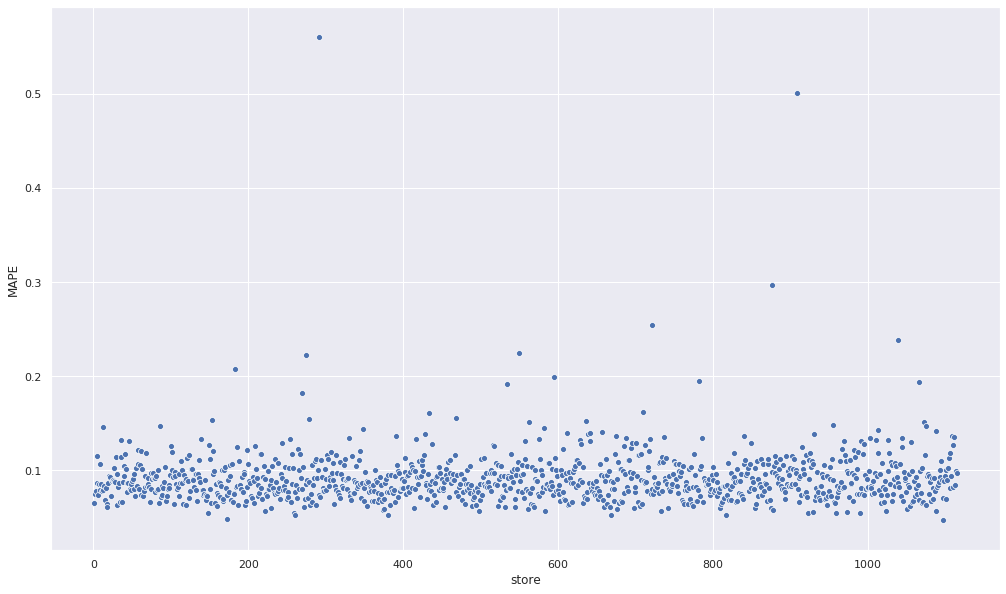

In [161]:
sns.scatterplot(x = 'store', y = 'MAPE', data = df72);

# Total Performance

In [162]:
df73 = df72[['predictions', 'worst_scenario', 'best_scenario']].apply(lambda x: np.sum(x), axis = 0).reset_index().rename(columns = {'index': 'Scenario', 0: 'Values'})
df73['Values'] = df73['Values'].map('R${:,.2f}'.format)
df73

,Scenario,Values
0,predictions,"R$285,195,938.05"
1,worst_scenario,"R$284,492,131.47"
2,best_scenario,"R$285,899,744.62"


# Machine Learnin Performance

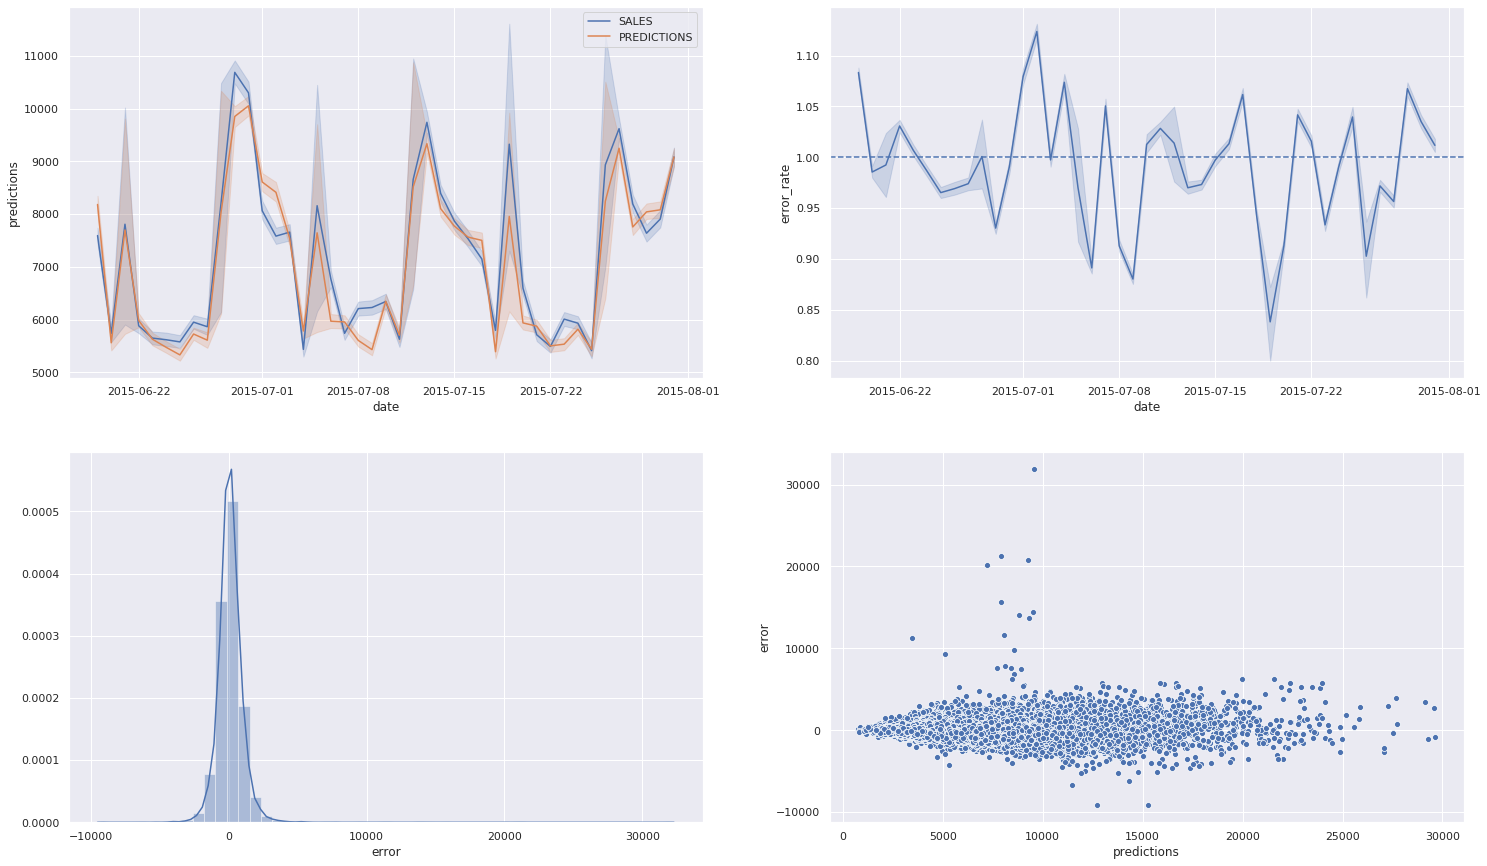

In [172]:
plt.subplot(2, 2, 1)
sns.lineplot(x = 'date', y = 'sales', data = df7, label = 'SALES');
sns.lineplot(x = 'date', y = 'predictions', data = df7, label = 'PREDICTIONS');

plt.subplot(2, 2, 2)
sns.lineplot(x = 'date', y = 'error_rate', data = df7);
plt.axhline(1, linestyle = '--')


plt.subplot(2, 2, 3)
sns.distplot(df7['error']);

plt.subplot(2, 2, 4)
sns.scatterplot(df7['predictions'], df7['error']);

# <font color = 'blue'> 5. Próximos Passos </font>

- Workshop do Modelo para os Business Users
- Coletar Feedbacks sobre a Usabilidade
- Aumentar em 10% a Acurácia do Modelo

# <font color = 'blue'> Q & A </font>

# <font color = 'blue'> Obrigado </font>